In [1]:
import pandas as pd
import numpy as np

rawdata = pd.read_csv('data/train.csv') #data used for train and test
val = pd.read_csv('data/test.csv')

In [2]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528256 entries, 0 to 528255
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   subject  528256 non-null  int64  
 1   acc1_x   528256 non-null  float64
 2   acc1_y   528256 non-null  float64
 3   acc1_z   528256 non-null  float64
 4   gyro1_x  528256 non-null  float64
 5   gyro1_y  528256 non-null  float64
 6   gyro1_z  528256 non-null  float64
 7   acc2_x   528256 non-null  float64
 8   acc2_y   528256 non-null  float64
 9   acc2_z   528256 non-null  float64
 10  label    528256 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 44.3 MB


<AxesSubplot:xlabel='label', ylabel='acc2_z'>

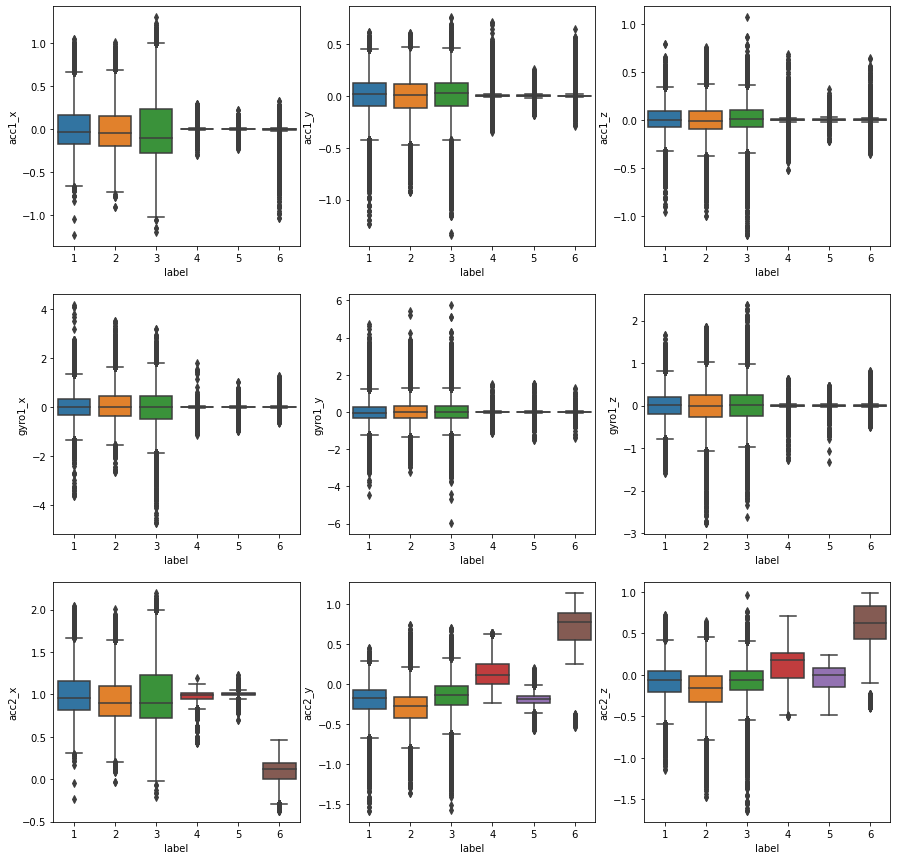

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
sns.boxplot(x = 'label',y = 'acc1_x',data= rawdata,ax = ax[0,0])
sns.boxplot(x = 'label',y = 'acc1_y',data= rawdata,ax = ax[0,1])
sns.boxplot(x = 'label',y = 'acc1_z',data= rawdata,ax = ax[0,2])

sns.boxplot(x = 'label',y = 'gyro1_x',data= rawdata,ax = ax[1,0])
sns.boxplot(x = 'label',y = 'gyro1_y',data= rawdata,ax = ax[1,1])
sns.boxplot(x = 'label',y = 'gyro1_z',data= rawdata,ax = ax[1,2])

sns.boxplot(x = 'label',y = 'acc2_x',data= rawdata,ax = ax[2,0])
sns.boxplot(x = 'label',y = 'acc2_y',data= rawdata,ax = ax[2,1])
sns.boxplot(x = 'label',y = 'acc2_z',data= rawdata,ax = ax[2,2])


data pattern in general is okay for acc2. Not sure whether acc1 and gyro1 would contribute much. acc2 has patterns to help differentiate the labels. 

In [4]:
rawdata.corr()

,subject,acc1_x,acc1_y,acc1_z,gyro1_x,gyro1_y,gyro1_z,acc2_x,acc2_y,acc2_z,label
subject,1.000000,0.000907,0.000525,0.001261,0.007061,-0.002599,-0.000977,-0.037435,0.062101,0.145392,0.038321
acc1_x,0.000907,1.000000,-0.301963,-0.244706,0.025139,0.079635,0.004601,0.474729,-0.091544,-0.071731,0.001300
acc1_y,0.000525,-0.301963,1.000000,0.187553,-0.056148,-0.032915,0.109110,-0.144721,0.298382,0.057135,0.008099
acc1_z,0.001261,-0.244706,0.187553,1.000000,-0.006839,-0.103791,0.023325,-0.115957,0.056452,0.287866,0.008451
gyro1_x,0.007061,0.025139,-0.056148,-0.006839,1.000000,-0.229882,-0.122243,0.001171,-0.014969,-0.004556,-0.007003
gyro1_y,-0.002599,0.079635,-0.032915,-0.103791,-0.229882,1.000000,0.107093,0.047270,-0.015651,-0.040679,-0.002525
gyro1_z,-0.000977,0.004601,0.109110,0.023325,-0.122243,0.107093,1.000000,-0.024865,0.065576,0.036888,0.024416
acc2_x,-0.037435,0.474729,-0.144721,-0.115957,0.001171,0.047270,-0.024865,1.000000,-0.741558,-0.652053,-0.571660
acc2_y,0.062101,-0.091544,0.298382,0.056452,-0.014969,-0.015651,0.065576,-0.741558,1.000000,0.608361,0.648737
acc2_z,0.145392,-0.071731,0.057135,0.287866,-0.004556,-0.040679,0.036888,-0.652053,0.608361,1.000000,0.592975


again, acc1 and gyro1 didn't give much contribution to predicting label.

The data talks about x,y,z. Perhaps it's good if we try to calculate the resultant

In [5]:
rawdata['resultant_acc1'] = np.sqrt((rawdata.acc1_x**2)+(rawdata.acc1_y**2)+(rawdata.acc1_z**2))
rawdata['resultant_gyro1'] = np.sqrt((rawdata.gyro1_x**2)+(rawdata.gyro1_y**2)+(rawdata.gyro1_z**2))
rawdata['resultant_acc2'] = np.sqrt((rawdata.acc2_x**2)+(rawdata.acc2_y**2)+(rawdata.acc2_z**2))

In [6]:
rawdata[['resultant_acc1','resultant_gyro1','resultant_acc2','label']].corr()

,resultant_acc1,resultant_gyro1,resultant_acc2,label
resultant_acc1,1.000000,0.683995,0.323219,-0.656586
resultant_gyro1,0.683995,1.000000,0.071695,-0.649281
resultant_acc2,0.323219,0.071695,1.000000,-0.069248
label,-0.656586,-0.649281,-0.069248,1.000000


Now acc1 and gyro1 has more meaning to the data. We can drop the original variables. We keep acc2 since we don't know whether the original variables would contribute more than the engineered variables.

In [7]:
dataengineered = rawdata.drop(['acc1_x','acc1_y','acc1_z','gyro1_x','gyro1_y','gyro1_z'],axis = 1)

We create a function to count resultant and drop original var except for acc2

In [8]:
def resultantanddrop(data):
    data['resultant_acc1'] = np.sqrt((data.acc1_x**2)+(data.acc1_y**2)+(data.acc1_z**2))
    data['resultant_gyro1'] = np.sqrt((data.gyro1_x**2)+(data.gyro1_y**2)+(data.gyro1_z**2))
    data['resultant_acc2'] = np.sqrt((data.acc2_x**2)+(data.acc2_y**2)+(data.acc2_z**2))
    return data.drop(['acc1_x','acc1_y','acc1_z','gyro1_x','gyro1_y','gyro1_z'],axis = 1)

We would want to split the data by subject to imitate nodes where the model will be sent in real life.

In [9]:
def databysubject(data):
    subindat = list(data.subject.unique())
    finaldict = dict()
    for i in subindat:
        tempdat = data[data.subject == i]
        xtemp = tempdat.drop(['subject','label'],axis = 1).to_numpy()
        ytemp = pd.get_dummies(tempdat.label).to_numpy()
        databysub = list(zip(xtemp,ytemp))
        namesub = "subject_{}".format(i)
        finaldict[namesub] = databysub
    return finaldict

as for the test data before validation, we should take several subjects from the raw data.

In [10]:
dataengineered.subject.unique()

array([ 3,  6, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 27, 29],
      dtype=int64)

In [11]:
test = dataengineered[dataengineered.subject.isin([20,22,23,27,29])]
train = dataengineered[~dataengineered.subject.isin([20,22,23,27,29])]

In [12]:
len(test)/len(dataengineered)

0.32081415071480496

let's batch the data of each subject by 25 datapoint per batch 

In [13]:
display(dataengineered.describe())
display(dataengineered.head())

,subject,acc2_x,acc2_y,acc2_z,label,resultant_acc1,resultant_gyro1,resultant_acc2
count,528256.000000,528256.000000,528256.000000,528256.000000,528256.000000,528256.000000,528256.000000,528256.000000
mean,17.011146,0.795017,0.037297,0.082804,3.651805,0.158885,0.383574,1.032561
std,6.918962,0.414711,0.415405,0.353811,1.759234,0.199864,0.483813,0.209391
min,3.000000,-0.373866,-1.588211,-1.639609,1.000000,0.000119,0.000243,0.124754
25%,14.000000,0.616319,-0.230586,-0.144502,2.000000,0.008696,0.018353,0.996092
50%,17.000000,0.949085,-0.086446,0.029347,4.000000,0.035605,0.131971,1.021365
75%,20.000000,1.017477,0.236949,0.233643,5.000000,0.275680,0.645283,1.036647
max,29.000000,2.197618,1.139030,0.987277,6.000000,1.706225,6.042247,2.572064


,subject,acc2_x,acc2_y,acc2_z,label,resultant_acc1,resultant_gyro1,resultant_acc2
0,3,0.951736,-0.303094,-0.133766,5,0.094286,1.434085,1.007750
1,3,0.918129,-0.301953,-0.111281,5,0.128745,1.608830,0.972892
2,3,0.958863,-0.288855,-0.078756,5,0.136845,1.245074,1.004519
3,3,1.008886,-0.274002,-0.048346,5,0.159986,0.889721,1.046549
4,3,0.982454,-0.250003,-0.003217,5,0.210160,0.884821,1.013770


In [14]:
import tensorflow as tf

In [15]:
traindata = databysubject(train)
def batch_data(full):
    data, label = zip(*full)
    dataset = tf.data.Dataset.from_tensor_slices((list(data),list(label)))
    return dataset.batch(25)

data_batched = dict()
for (sub, data) in traindata.items():
    data_batched[sub] = batch_data(data)

for the test data, we don't need to split them by subject because the only purpose is to see how the global model from federated learning would perform on unseen data.

In [16]:
traindata['subject_3'][0:3] #make sure result is correct

[(array([ 0.9517357 , -0.3030943 , -0.133766  ,  0.09428601,  1.43408528,
          1.00775014]),
  array([0, 0, 0, 0, 1, 0], dtype=uint8)),
 (array([ 0.9181289 , -0.3019532 , -0.1112807 ,  0.1287445 ,  1.6088297 ,
          0.97289249]),
  array([0, 0, 0, 0, 1, 0], dtype=uint8)),
 (array([ 0.9588635 , -0.2888554 , -0.07875562,  0.13684524,  1.24507421,
          1.00451934]),
  array([0, 0, 0, 0, 1, 0], dtype=uint8))]

In [17]:
len(list(data_batched['subject_3']))

1680

In [18]:
xtest = test.drop(['subject','label'],axis = 1).to_numpy()
ytest = pd.get_dummies(test.label).to_numpy()
test_batched = tf.data.Dataset.from_tensor_slices((xtest,ytest)).batch(len(xtest))

In [19]:
display(test.head())
xtest[0]

,subject,acc2_x,acc2_y,acc2_z,label,resultant_acc1,resultant_gyro1,resultant_acc2
358784,20,1.013620,-0.149275,0.118737,5,0.022055,0.373267,1.031410
358785,20,1.011580,-0.157103,0.128507,5,0.034874,0.309508,1.031741
358786,20,1.009748,-0.152929,0.123360,5,0.028961,0.298511,1.028687
358787,20,1.007297,-0.155507,0.129447,5,0.036077,0.302459,1.027417
358788,20,1.007943,-0.163917,0.147777,5,0.056608,0.235927,1.031822


array([ 1.01362   , -0.1492746 ,  0.1187369 ,  0.02205543,  0.37326667,
        1.03141013])

# MODELING

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [21]:
def SimpleMLP(shape,classes):
    model = Sequential()
    model.add(Dense(12,input_shape=(shape,))) 
    model.add(Activation('tanh'))
    model.add(Dense(6))
    model.add(Activation('tanh'))
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    return model

In [22]:
def weight_scaling_factor(data,sub):
    #this one is 
    sub_name = list(data.keys())
    #get the bs
    bs = list(data[sub])[0][0].shape[0]
    
    #calculate total training data batch within a client
    global_count = sum([tf.data.experimental.cardinality(data[subs]).numpy() for subs in sub_name])*bs
    
    #get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(data[sub]).numpy()*bs
    return local_count/global_count

def scale_model_weights(weight,scalar):
    weight_final= []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar*weight[i])
    return weight_final

def sum_scaled_weights(scaled_weight_list):
    avg_grad = list()
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple,axis = 0)
        avg_grad.append(layer_mean)
    
    return avg_grad

In [23]:
from sklearn.metrics import accuracy_score
def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    pred = model.predict(X_test)
    loss = cce(Y_test, pred)
    acc = accuracy_score(tf.argmax(Y_test, axis=1),tf.argmax(pred, axis=1))
    print('comm_round: {} | global_acc/micro f1_score: {:.3%} | global_loss: {}'.format(comm_round, acc,loss))
    return acc, loss


In [24]:
#initialize global model
global_model = SimpleMLP(6,6)

#commence global training loop
import random
comms_round = 25 #similar to epoch
subject_names= list(data_batched.keys())
#initial weights
for comm_round in range(comms_round):
            
    #initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    random.seed(42) #keep result of shuffle reproducible
    random.shuffle(subject_names) 
    #the purpose is to imitate randomness in real world
    
    #loop through each client and create new local model
    for sub in subject_names:
        local_model = SimpleMLP(6,6)
        local_model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(data_batched[sub], epochs=20, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scaling_factor(data_batched, sub)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)
    
    #test global model and print out metrics after each communications round
    for(xtest, ytest) in test_batched:
        global_acc, global_loss = test_model(xtest, ytest, global_model, comm_round)

comm_round: 0 | global_acc/micro f1_score: 63.002% | global_loss: 1.429860234260559
comm_round: 1 | global_acc/micro f1_score: 68.302% | global_loss: 1.3524526357650757
comm_round: 2 | global_acc/micro f1_score: 66.480% | global_loss: 1.3634852170944214
comm_round: 3 | global_acc/micro f1_score: 71.349% | global_loss: 1.3368250131607056
comm_round: 4 | global_acc/micro f1_score: 69.153% | global_loss: 1.3498637676239014
comm_round: 5 | global_acc/micro f1_score: 66.313% | global_loss: 1.360990047454834
comm_round: 6 | global_acc/micro f1_score: 66.160% | global_loss: 1.3584558963775635
comm_round: 7 | global_acc/micro f1_score: 68.770% | global_loss: 1.3432989120483398
comm_round: 8 | global_acc/micro f1_score: 65.603% | global_loss: 1.3652348518371582
comm_round: 9 | global_acc/micro f1_score: 64.647% | global_loss: 1.379886507987976
comm_round: 10 | global_acc/micro f1_score: 68.852% | global_loss: 1.3395742177963257
comm_round: 11 | global_acc/micro f1_score: 68.265% | global_loss: 

The global model performance revolves only at around 70%.

now we validate our model by checking it with the test data (from test.csv)

In [25]:
valengineered = resultantanddrop(val)
xval = valengineered.drop(['subject','label'],axis = 1).to_numpy()
yval = pd.get_dummies(valengineered.label).to_numpy()
val_batched = tf.data.Dataset.from_tensor_slices((xval,yval)).batch(len(xval))

In [26]:
for x, y in val_batched:
    test_model(x,y,global_model,1)

comm_round: 1 | global_acc/micro f1_score: 64.774% | global_loss: 1.416568398475647
